# Ensemble Learning

1.  Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.

In [2]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Initialize a Bagging Classifier with the Decision Tree as the base estimator
bagging_classifier = BaggingClassifier(estimator=dt_classifier, n_estimators=10, random_state=42)

# Train the Bagging Classifier
bagging_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Bagging Classifier: {accuracy}")

Accuracy of the Bagging Classifier: 0.885


2.  Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE).

In [3]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate a sample dataset for regression
X_reg, y_reg = make_regression(n_samples=1000, n_features=20, random_state=42)

# Split data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Initialize a Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Initialize a Bagging Regressor with the Decision Tree as the base estimator
bagging_regressor = BaggingRegressor(estimator=dt_regressor, n_estimators=10, random_state=42)

# Train the Bagging Regressor
bagging_regressor.fit(X_train_reg, y_train_reg)

# Make predictions on the test set
y_pred_reg = bagging_regressor.predict(X_test_reg)

# Calculate and print the Mean Squared Error
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Mean Squared Error of the Bagging Regressor: {mse}")

Mean Squared Error of the Bagging Regressor: 9462.992186060874


3.  Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores.

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
feature_names = breast_cancer.feature_names

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest Classifier
random_forest.fit(X_train, y_train)

# Get feature importances
feature_importances = random_forest.feature_importances_

# Create a pandas Series for better visualization of feature importances
feature_importance_series = pd.Series(feature_importances, index=feature_names)

# Sort feature importances in descending order
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# Print feature importance scores
print("Feature Importance Scores (Random Forest Classifier):")
print(sorted_feature_importances)

Feature Importance Scores (Random Forest Classifier):
worst area                 0.153892
worst concave points       0.144663
mean concave points        0.106210
worst radius               0.077987
mean concavity             0.068001
worst perimeter            0.067115
mean perimeter             0.053270
mean radius                0.048703
mean area                  0.047555
worst concavity            0.031802
area error                 0.022407
worst texture              0.021749
worst compactness          0.020266
radius error               0.020139
mean compactness           0.013944
mean texture               0.013591
perimeter error            0.011303
worst smoothness           0.010644
worst symmetry             0.010120
concavity error            0.009386
mean smoothness            0.007285
fractal dimension error    0.005321
compactness error          0.005253
worst fractal dimension    0.005210
texture error              0.004724
smoothness error           0.004271
symmetry e

4. Train a Random Forest Regressor and compare its performance with a single Decision Tree.

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate a sample dataset for regression
X_reg, y_reg = make_regression(n_samples=1000, n_features=20, random_state=42)

# Split data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Initialize a Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Initialize a Random Forest Regressor
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Decision Tree Regressor
dt_regressor.fit(X_train_reg, y_train_reg)

# Train the Random Forest Regressor
random_forest_regressor.fit(X_train_reg, y_train_reg)

# Make predictions on the test set
y_pred_dt = dt_regressor.predict(X_test_reg)
y_pred_rf = random_forest_regressor.predict(X_test_reg)

# Calculate Mean Squared Error for both models
mse_dt = mean_squared_error(y_test_reg, y_pred_dt)
mse_rf = mean_squared_error(y_test_reg, y_pred_rf)

# Print the Mean Squared Error for both models
print(f"Mean Squared Error of the Decision Tree Regressor: {mse_dt}")
print(f"Mean Squared Error of the Random Forest Regressor: {mse_rf}")

Mean Squared Error of the Decision Tree Regressor: 21352.575144570023
Mean Squared Error of the Random Forest Regressor: 8592.244973007591


5. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier.

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Split data into training and testing sets (OOB score is computed on training data, but splitting is still good practice)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Random Forest Classifier with oob_score set to True
random_forest_oob = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)

# Train the Random Forest Classifier
random_forest_oob.fit(X_train, y_train)

# Get the Out-of-Bag score
oob_score = random_forest_oob.oob_score_

# Print the Out-of-Bag score
print(f"Out-of-Bag Score of the Random Forest Classifier: {oob_score}")

Out-of-Bag Score of the Random Forest Classifier: 0.9560439560439561


6. Train a Bagging Classifier using SVM as a base estimator and print accuracy.

In [7]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Support Vector Machine (SVM) Classifier
svm_classifier = SVC(random_state=42)

# Initialize a Bagging Classifier with the SVM as the base estimator
bagging_svm_classifier = BaggingClassifier(estimator=svm_classifier, n_estimators=10, random_state=42)

# Train the Bagging Classifier
bagging_svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm_bagging = bagging_svm_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy_svm_bagging = accuracy_score(y_test, y_pred_svm_bagging)
print(f"Accuracy of the Bagging Classifier with SVM: {accuracy_svm_bagging}")

Accuracy of the Bagging Classifier with SVM: 0.87


7.  Train a Random Forest Classifier with different numbers of trees and compare accuracy.

Accuracy with 10 trees: 0.956140350877193
Accuracy with 50 trees: 0.9649122807017544
Accuracy with 100 trees: 0.9649122807017544
Accuracy with 200 trees: 0.9649122807017544
Accuracy with 500 trees: 0.9649122807017544


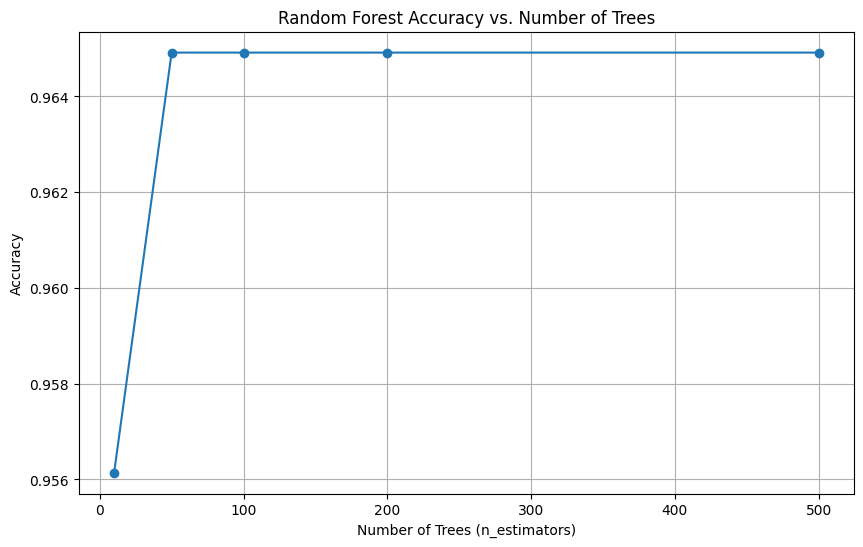

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of different numbers of trees to experiment with
n_estimators_list = [10, 50, 100, 200, 500]
accuracy_scores = []

# Train Random Forest Classifiers with different numbers of trees and store accuracy
for n_estimators in n_estimators_list:
    random_forest = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    random_forest.fit(X_train, y_train)
    y_pred = random_forest.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"Accuracy with {n_estimators} trees: {accuracy}")

# Optional: Plot the accuracies to visualize the effect of the number of trees
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, accuracy_scores, marker='o')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy vs. Number of Trees")
plt.grid(True)
plt.show()

8. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.

In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Logistic Regression Classifier
lr_classifier = LogisticRegression(random_state=42)

# Initialize a Bagging Classifier with Logistic Regression as the base estimator
bagging_lr_classifier = BaggingClassifier(estimator=lr_classifier, n_estimators=10, random_state=42)

# Train the Bagging Classifier
bagging_lr_classifier.fit(X_train, y_train)

# Make probability predictions on the test set
y_pred_proba_lr_bagging = bagging_lr_classifier.predict_proba(X_test)[:, 1]

# Calculate and print the AUC score
auc_lr_bagging = roc_auc_score(y_test, y_pred_proba_lr_bagging)
print(f"AUC Score of the Bagging Classifier with Logistic Regression: {auc_lr_bagging}")

AUC Score of the Bagging Classifier with Logistic Regression: 0.9225203497135966


9. Train a Random Forest Regressor and analyze feature importance scores.

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import pandas as pd

# Generate a sample dataset for regression
X_reg, y_reg = make_regression(n_samples=1000, n_features=20, random_state=42)

# Split data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Initialize a Random Forest Regressor
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest Regressor
random_forest_regressor.fit(X_train_reg, y_train_reg)

# Get feature importances
feature_importances_reg = random_forest_regressor.feature_importances_

# Create a pandas Series for better visualization of feature importances
feature_importance_series_reg = pd.Series(feature_importances_reg, index=[f'feature_{i}' for i in range(X_reg.shape[1])])

# Sort feature importances in descending order
sorted_feature_importances_reg = feature_importance_series_reg.sort_values(ascending=False)

# Print feature importance scores
print("Feature Importance Scores (Random Forest Regressor):")
print(sorted_feature_importances_reg)

Feature Importance Scores (Random Forest Regressor):
feature_16    0.278247
feature_4     0.200561
feature_15    0.145842
feature_5     0.125427
feature_2     0.101418
feature_18    0.022312
feature_1     0.016148
feature_10    0.009990
feature_17    0.009499
feature_12    0.009324
feature_11    0.009227
feature_14    0.009062
feature_13    0.008921
feature_9     0.008675
feature_8     0.008085
feature_6     0.008013
feature_7     0.007857
feature_19    0.007358
feature_0     0.007162
feature_3     0.006872
dtype: float64


10. Train an ensemble model using both Bagging and Random Forest and compare accuracy.

In [18]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base models
bagging_classifier = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=10, random_state=42)
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the base models explicitly
bagging_classifier.fit(X_train, y_train)
random_forest_classifier.fit(X_train, y_train)


# Define the list of estimators for stacking
estimators = [('bagging', bagging_classifier), ('random_forest', random_forest_classifier)]

# Initialize the Stacking Classifier
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Train the Stacking Classifier
stacking_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_bagging = bagging_classifier.predict(X_test)
y_pred_random_forest = random_forest_classifier.predict(X_test)
y_pred_stacking = stacking_classifier.predict(X_test)


# Calculate and print the accuracy of each model
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)


print(f"Accuracy of the Bagging Classifier: {accuracy_bagging}")
print(f"Accuracy of the Random Forest Classifier: {accuracy_random_forest}")
print(f"Accuracy of the Stacking Classifier: {accuracy_stacking}")

Accuracy of the Bagging Classifier: 0.885
Accuracy of the Random Forest Classifier: 0.9
Accuracy of the Stacking Classifier: 0.88


11. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV.

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

# Evaluate the best model on the test set
best_random_forest = grid_search.best_estimator_
test_accuracy = best_random_forest.score(X_test, y_test)
print(f"Test set accuracy with best parameters: {test_accuracy}")

Best parameters found: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation accuracy: 0.9626373626373625
Test set accuracy with best parameters: 0.9649122807017544


12.  Train a Bagging Regressor with different numbers of base estimators and compare performance.

Mean Squared Error with 10 base estimators: 9462.992186060874
Mean Squared Error with 50 base estimators: 8308.576076264717
Mean Squared Error with 100 base estimators: 8517.426228499578
Mean Squared Error with 200 base estimators: 8528.914182532735
Mean Squared Error with 500 base estimators: 8455.305284761947


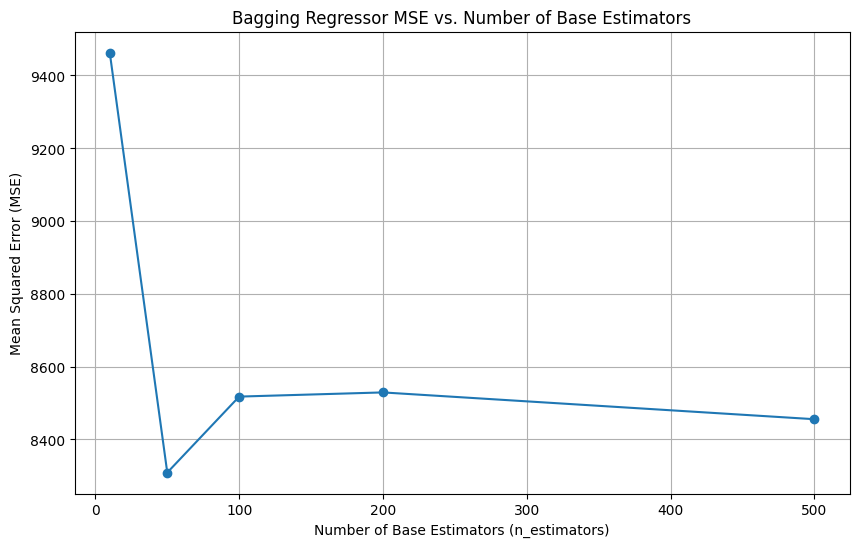

In [20]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Generate a sample dataset for regression
X_reg, y_reg = make_regression(n_samples=1000, n_features=20, random_state=42)

# Split data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Define a list of different numbers of base estimators to experiment with
n_estimators_list = [10, 50, 100, 200, 500]
mse_scores = []

# Train Bagging Regressors with different numbers of base estimators and store MSE
for n_estimators in n_estimators_list:
    bagging_regressor = BaggingRegressor(estimator=DecisionTreeRegressor(random_state=42), n_estimators=n_estimators, random_state=42)
    bagging_regressor.fit(X_train_reg, y_train_reg)
    y_pred_reg = bagging_regressor.predict(X_test_reg)
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    mse_scores.append(mse)
    print(f"Mean Squared Error with {n_estimators} base estimators: {mse}")

# Optional: Plot the MSEs to visualize the effect of the number of base estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, mse_scores, marker='o')
plt.xlabel("Number of Base Estimators (n_estimators)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Bagging Regressor MSE vs. Number of Base Estimators")
plt.grid(True)
plt.show()

13. Train a Random Forest Classifier and analyze misclassified samples.

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
feature_names = breast_cancer.feature_names
target_names = breast_cancer.target_names

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest Classifier
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(X_test)

# Identify misclassified samples
misclassified_indices = [i for i, (true, pred) in enumerate(zip(y_test, y_pred)) if true != pred]

print(f"Number of misclassified samples: {len(misclassified_indices)}")

if len(misclassified_indices) > 0:
    print("\nMisclassified samples (index in test set):")
    for i in misclassified_indices:
        print(f"Index: {i}, True Class: {target_names[y_test[i]]}, Predicted Class: {target_names[y_pred[i]]}")
        # You can optionally print features of misclassified samples
        # print(f"Features: {X_test[i]}")

Number of misclassified samples: 4

Misclassified samples (index in test set):
Index: 8, True Class: benign, Predicted Class: malignant
Index: 20, True Class: malignant, Predicted Class: benign
Index: 77, True Class: malignant, Predicted Class: benign
Index: 82, True Class: malignant, Predicted Class: benign


14. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier.

In [22]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Initialize a Bagging Classifier with the Decision Tree as the base estimator
bagging_classifier = BaggingClassifier(estimator=dt_classifier, n_estimators=10, random_state=42)

# Train the Decision Tree Classifier
dt_classifier.fit(X_train, y_train)

# Train the Bagging Classifier
bagging_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)
y_pred_bagging = bagging_classifier.predict(X_test)

# Calculate and print the accuracy for both models
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)

print(f"Accuracy of the Decision Tree Classifier: {accuracy_dt}")
print(f"Accuracy of the Bagging Classifier: {accuracy_bagging}")

Accuracy of the Decision Tree Classifier: 0.875
Accuracy of the Bagging Classifier: 0.885


15.  Train a Random Forest Classifier and visualize the confusion matrix.

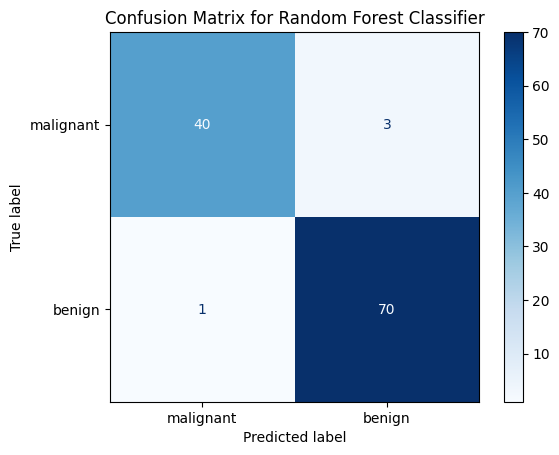

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
target_names = breast_cancer.target_names

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest Classifier
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

16. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy.

In [24]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base estimators
estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42)), # SVC needs probability=True for stacking with default final_estimator
    ('lr', LogisticRegression(random_state=42))
]

# Initialize the Stacking Classifier
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Train the Stacking Classifier
stacking_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_stacking = stacking_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"Accuracy of the Stacking Classifier: {accuracy_stacking}")

# Optional: Compare with individual base estimator accuracies
# You would need to train and evaluate individual base estimators separately
# dt_classifier = DecisionTreeClassifier(random_state=42)
# dt_classifier.fit(X_train, y_train)
# y_pred_dt = dt_classifier.predict(X_test)
# accuracy_dt = accuracy_score(y_test, y_pred_dt)
# print(f"Accuracy of Decision Tree Classifier: {accuracy_dt}")

Accuracy of the Stacking Classifier: 0.865


17.  Train a Random Forest Classifier and print the top 5 most important features.

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
feature_names = breast_cancer.feature_names

# Split data into training and testing sets (although not strictly needed for feature importance, it's good practice)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest Classifier
random_forest.fit(X_train, y_train)

# Get feature importances
feature_importances = random_forest.feature_importances_

# Create a pandas Series for better visualization of feature importances
feature_importance_series = pd.Series(feature_importances, index=feature_names)

# Sort feature importances in descending order and get the top 5
top_5_important_features = feature_importance_series.sort_values(ascending=False).head(5)

# Print the top 5 most important features
print("Top 5 Most Important Features (Random Forest Classifier):")
print(top_5_important_features)

Top 5 Most Important Features (Random Forest Classifier):
worst area              0.153892
worst concave points    0.144663
mean concave points     0.106210
worst radius            0.077987
mean concavity          0.068001
dtype: float64


18. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score.

In [26]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Initialize a Bagging Classifier with the Decision Tree as the base estimator
bagging_classifier = BaggingClassifier(estimator=dt_classifier, n_estimators=10, random_state=42)

# Train the Bagging Classifier
bagging_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_classifier.predict(X_test)

# Print the classification report
print("Classification Report for Bagging Classifier:")
print(classification_report(y_test, y_pred))

Classification Report for Bagging Classifier:
              precision    recall  f1-score   support

           0       0.82      0.96      0.89        93
           1       0.96      0.82      0.88       107

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.88       200



19. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy.

Accuracy with max_depth=None: 0.9649122807017544
Accuracy with max_depth=5: 0.9649122807017544
Accuracy with max_depth=10: 0.9649122807017544
Accuracy with max_depth=20: 0.9649122807017544


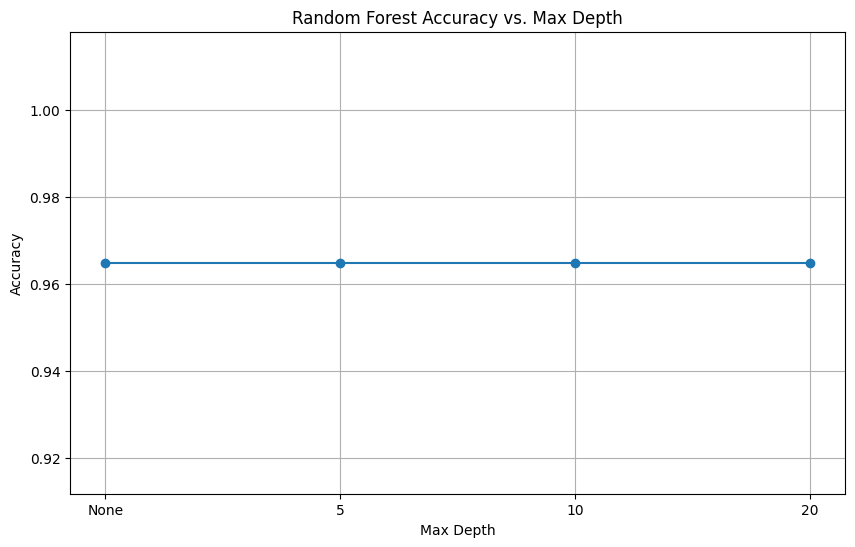

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of different max_depth values to experiment with
max_depth_list = [None, 5, 10, 20]
accuracy_scores = []

# Train Random Forest Classifiers with different max_depth values and store accuracy
for max_depth in max_depth_list:
    random_forest = RandomForestClassifier(n_estimators=100, max_depth=max_depth, random_state=42)
    random_forest.fit(X_train, y_train)
    y_pred = random_forest.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"Accuracy with max_depth={max_depth}: {accuracy}")

# Optional: Plot the accuracies to visualize the effect of max_depth
plt.figure(figsize=(10, 6))
plt.plot([str(depth) for depth in max_depth_list], accuracy_scores, marker='o')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy vs. Max Depth")
plt.grid(True)
plt.show()

20.  Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare
performance.

In [28]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate a sample dataset for regression
X_reg, y_reg = make_regression(n_samples=1000, n_features=20, random_state=42)

# Split data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Initialize Decision Tree and KNeighbors Regressors
dt_regressor = DecisionTreeRegressor(random_state=42)
knn_regressor = KNeighborsRegressor()

# Initialize Bagging Regressors with different base estimators
bagging_dt_regressor = BaggingRegressor(estimator=dt_regressor, n_estimators=10, random_state=42)
bagging_knn_regressor = BaggingRegressor(estimator=knn_regressor, n_estimators=10, random_state=42)

# Train the Bagging Regressors
bagging_dt_regressor.fit(X_train_reg, y_train_reg)
bagging_knn_regressor.fit(X_train_reg, y_train_reg)

# Make predictions on the test set
y_pred_bagging_dt = bagging_dt_regressor.predict(X_test_reg)
y_pred_bagging_knn = bagging_knn_regressor.predict(X_test_reg)

# Calculate Mean Squared Error for both Bagging Regressors
mse_bagging_dt = mean_squared_error(y_test_reg, y_pred_bagging_dt)
mse_bagging_knn = mean_squared_error(y_test_reg, y_pred_bagging_knn)

# Print the Mean Squared Error for both Bagging Regressors
print(f"Mean Squared Error of Bagging Regressor with Decision Tree: {mse_bagging_dt}")
print(f"Mean Squared Error of Bagging Regressor with KNeighbors: {mse_bagging_knn}")

Mean Squared Error of Bagging Regressor with Decision Tree: 9462.992186060874
Mean Squared Error of Bagging Regressor with KNeighbors: 14832.180009089792


21. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score.

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest Classifier
random_forest.fit(X_train, y_train)

# Make probability predictions on the test set
y_pred_proba = random_forest.predict_proba(X_test)[:, 1]

# Calculate and print the ROC-AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score of the Random Forest Classifier: {auc_score}")

ROC-AUC Score of the Random Forest Classifier: 0.9952505732066819


22. Train a Bagging Classifier and evaluate its performance using cross-validation.

In [30]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Initialize a Decision Tree Classifier (as the base estimator)
dt_classifier = DecisionTreeClassifier(random_state=42)

# Initialize a Bagging Classifier
bagging_classifier = BaggingClassifier(estimator=dt_classifier, n_estimators=10, random_state=42)

# Perform cross-validation
# We'll use accuracy as the scoring metric, and 5 folds for cross-validation
cv_scores = cross_val_score(bagging_classifier, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean()}")

Cross-validation scores: [0.95  0.9   0.895 0.895 0.86 ]
Mean cross-validation accuracy: 0.9


23. Train a Random Forest Classifier and plot the Precision-Recall curve.

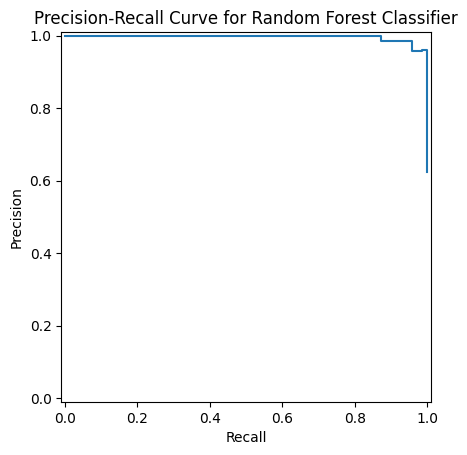

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest Classifier
random_forest.fit(X_train, y_train)

# Get probability predictions for the positive class
y_scores = random_forest.predict_proba(X_test)[:, 1]

# Compute the precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Plot the precision-recall curve
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title('Precision-Recall Curve for Random Forest Classifier')
plt.show()

24. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy.

In [32]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base estimators
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(random_state=42))
]

# Initialize the Stacking Classifier
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Train the Stacking Classifier
stacking_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_stacking = stacking_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"Accuracy of the Stacking Classifier: {accuracy_stacking}")

# Optional: Compare with individual base estimator accuracies
# You would need to train and evaluate individual base estimators separately
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_classifier.fit(X_train, y_train)
# y_pred_rf = rf_classifier.predict(X_test)
# accuracy_rf = accuracy_score(y_test, y_pred_rf)
# print(f"Accuracy of Random Forest Classifier: {accuracy_rf}")

# lr_classifier = LogisticRegression(random_state=42)
# lr_classifier.fit(X_train, y_train)
# y_pred_lr = lr_classifier.predict(X_test)
# accuracy_lr = accuracy_score(y_test, y_pred_lr)
# print(f"Accuracy of Logistic Regression Classifier: {accuracy_lr}")

Accuracy of the Stacking Classifier: 0.89


25.  Train a Bagging Regressor with different levels of bootstrap samples and compare performance.

Mean Squared Error with max_samples=0.5: 11858.297162932005
Mean Squared Error with max_samples=0.7: 9761.713451886364
Mean Squared Error with max_samples=1.0: 9462.992186060874


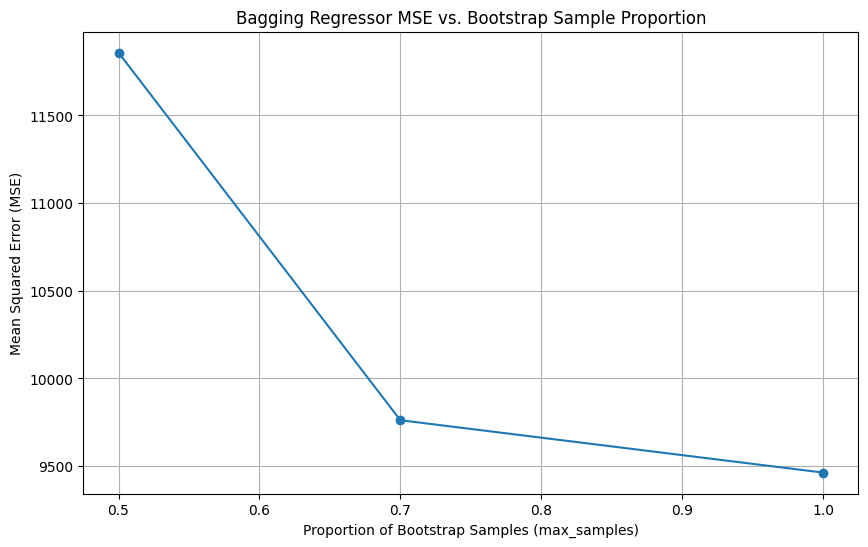

In [33]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Generate a sample dataset for regression
X_reg, y_reg = make_regression(n_samples=1000, n_features=20, random_state=42)

# Split data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Define a list of different max_samples values to experiment with
max_samples_list = [0.5, 0.7, 1.0] # Proportions of samples to draw
mse_scores = []

# Train Bagging Regressors with different max_samples values and store MSE
for max_samples in max_samples_list:
    bagging_regressor = BaggingRegressor(estimator=DecisionTreeRegressor(random_state=42), n_estimators=10, max_samples=max_samples, random_state=42)
    bagging_regressor.fit(X_train_reg, y_train_reg)
    y_pred_reg = bagging_regressor.predict(X_test_reg)
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    mse_scores.append(mse)
    print(f"Mean Squared Error with max_samples={max_samples}: {mse}")

# Optional: Plot the MSEs to visualize the effect of max_samples
plt.figure(figsize=(10, 6))
plt.plot(max_samples_list, mse_scores, marker='o')
plt.xlabel("Proportion of Bootstrap Samples (max_samples)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Bagging Regressor MSE vs. Bootstrap Sample Proportion")
plt.grid(True)
plt.show()